- [First look](#first_look)
    - [(1) Check data for NA](#check_na)
    
- [EDA(Exploratory Data Analysis)](#eda)
    - [(1) Survived](#survived)
    - [(2) Age](#age)
    - [(3) Cabin](#cabin)
    - [(3) Family](#family)
    - [(3) Pclass](#pclass)
    - [(3) Sex](#sex)
    - [(3) Embarked](#embarked)
    - [(3) Fare](#fare)



<a id="eda"></a>
## EDA(Exploratory Data Analysis)
> *references*
> [https://www.kaggle.com/demidova/titanic-eda-tutorial](https://www.kaggle.com/demidova/titanic-eda-tutorial)
> [https://www.kaggle.com/demidova/titanic-logistic-regression-random-forest-xgboost?scriptVersionId=46567425]

![titanic](https://ww.namu.la/s/1cc50931b5875401a9465ba06eaaf3d357ebfeabdf50346cd03636ab60ef0a9783a060b2c9cc7808148cd2a075699fa0f094e7f34df4a69fd5fdeb31137a37ef6e3a6c57a0b629606097a954052b7abba6a51a1a32ed5be9a92174b2ada23080602e6277fd7f0a200ddffcbd5b581746)
- [https://namu.wiki/jump/9AGb4mj%2Bgar2D116rRySHULPcuF9aQA9dU1%2FKaQlJabHnX1Bwo7dW3QKZZU5EDX7tyS7%2BeKInzFlBX0PyH2gvmr0xlEeT19AQhYRU4yv8erx25eqVyS5NlWU2pDAk3mhBaO4i%2BaABck5vAWwFaAE0g%3D%3D](https://namu.wiki/jump/9AGb4mj%2Bgar2D116rRySHULPcuF9aQA9dU1%2FKaQlJabHnX1Bwo7dW3QKZZU5EDX7tyS7%2BeKInzFlBX0PyH2gvmr0xlEeT19AQhYRU4yv8erx25eqVyS5NlWU2pDAk3mhBaO4i%2BaABck5vAWwFaAE0g%3D%3D)

<a id='data_import'></a>
### (1) Data Import

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import os

print("Version Pandas", pd.__version__)
print("Version Matplotlib", matplotlib.__version__)
print("Version Numpy", np.__version__)
print("Version Seaborn", sb.__version__)

os.listdir('../input/tabular-playground-series-apr-2021/')

Version Pandas 1.2.3
Version Matplotlib 3.4.1
Version Numpy 1.19.5
Version Seaborn 0.11.1


['sample_submission.csv', 'train.csv', 'test.csv']

In [2]:
BASE_DIR = '../input/tabular-playground-series-apr-2021/'
train = pd.read_csv(BASE_DIR + 'train.csv')
test = pd.read_csv(BASE_DIR + 'test.csv')
sample_submission = pd.read_csv(BASE_DIR + 'sample_submission.csv')

train.shape, test.shape, sample_submission.shape

((100000, 12), (100000, 11), (100000, 2))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [5]:
sample_submission.head()

,PassengerId,Survived
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [6]:
frames= [train, test]
total_df=pd.concat(frames, sort=False)
print('total data shape: ', total_df.shape)
total_df.head()

total data shape:  (200000, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1.0,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0.0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0.0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0.0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1.0,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [7]:
total_df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,200000,200000,190196,61303,199473
unique,174854,2,132613,45442,3
top,"Smith, James",male,A/5,C11139,S
freq,61,125871,646,7,140981


In [8]:
total_df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,200000,200000,190196,61303,199473
unique,174854,2,132613,45442,3
top,"Smith, James",male,A/5,C11139,S
freq,61,125871,646,7,140981


<a id="check_na"></a>
### (2) Check data for NA
- dataset의 feature들을 살펴보고, null data의 여부를 체크해보자

> 종속변수
> - **Survived(생존여부)**: target label (1,0) -> integer 

> 독립변수
> - **PassengerId**: 10000명
> - **Pclass(티켓의 클래스)**: Upper(1), Middle(2), Lower(3) -> categorical -> integer
> - **Name(이름)**: 탑승자 성명들 
> - **Sex(성별)**: Male, Female -> binary -> string
> - **Age(나이)**: continuous -> integer
> - **SibSp(함께 탑승한 형제와 배우자의 수)**: quantitative -> integer 
> - **Parch(함께 탑승한 부모, 아이의 수)**: quantitative -> integer
> - **Ticket(티켓 번호)**: alphabet + integer -> string
> - **Fare(탑승료)**: continous -> float
> - **Cabin(객실 번호)**: alphabet + integer -> string
> - **Embarked(탑승항구)**: C(Cherbourg), Q(Queenstown), S(Southhampton) -> string

*references*
- [https://kaggle-kr.tistory.com/17](https://kaggle-kr.tistory.com/17)

In [9]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  200000 non-null  int64  
 1   Survived     100000 non-null  float64
 2   Pclass       200000 non-null  int64  
 3   Name         200000 non-null  object 
 4   Sex          200000 non-null  object 
 5   Age          193221 non-null  float64
 6   SibSp        200000 non-null  int64  
 7   Parch        200000 non-null  int64  
 8   Ticket       190196 non-null  object 
 9   Fare         199733 non-null  float64
 10  Cabin        61303 non-null   object 
 11  Embarked     199473 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 19.8+ MB


Age, Fare -> numeric variables\
Pclass -> integer but in fact 'categorical variable'

In [10]:
total_df_na=total_df.isna().sum()
train_na=train.isna().sum()
test_na=test.isna().sum()

pd.concat([train_na, test_na, total_df_na], axis=1, sort=False, keys=['Train NA','Test NA','Total NA'])

,Train NA,Test NA,Total NA
PassengerId,0,0.0,0
Survived,0,NaN,100000
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,3292,3487.0,6779
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,4623,5181.0,9804
Fare,134,133.0,267


missing data를 handling하기 위해서 EDA에서는 dataset을 합쳤지만, ML에서는 'data leakage'를 피하기 위해서 오직 train data set만 사용할 것이다. 

In [11]:
total_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,200000.000000,100000.000000,200000.000000,193221.000000,200000.000000,200000.000000,199733.000000
mean,99999.500000,0.427740,2.237920,34.464565,0.442120,0.473695,44.652071
std,57735.171256,0.494753,0.868273,16.783847,0.819392,0.937125,67.436104
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.050000
25%,49999.750000,0.000000,1.000000,22.000000,0.000000,0.000000,10.080000
50%,99999.500000,0.000000,3.000000,31.000000,0.000000,0.000000,20.250000
75%,149999.250000,1.000000,3.000000,48.000000,1.000000,1.000000,34.850000
max,199999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


<a id="survived"></a>
### (1) Survived
- train set에서 survived의 0,1 분포가 어떤지 확인해보겠습니다. 
- 분포에 따라 모델의 평가 방법이 달라질 수 있습니다. 

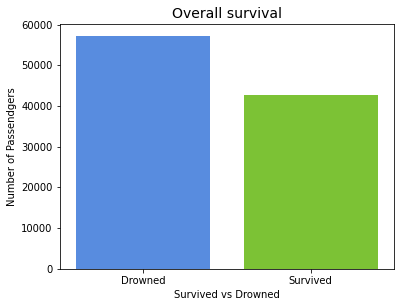

In [12]:
plt.figure(figsize=(6, 4.5))

ax= sb.countplot(x='Survived', data=total_df, palette=['#4287f5','#7cd91e'])

plt.xticks(np.arange(2), ['Drowned','Survived'])
plt.title('Overall survival', fontsize=14)
plt.xlabel('Survived vs Drowned')
plt.ylabel('Number of Passendgers')

labels=(total_df['Survived'].value_counts())

for i,v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment='center', size=14, color='w', fontweight='bold')
    
plt.show()

In [13]:
total_df['Survived'].value_counts(normalize=True)

0.0    0.57226
1.0    0.42774
Name: Survived, dtype: float64

<a id="independent_variables"></a>
### (2) Independent Variables 
> *references*
> - [https://wikidocs.net/75068](https://wikidocs.net/75068)

#### 1) Age
6779 : age missing values
- 3292 : train dataset
- 3487 : test dataset

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


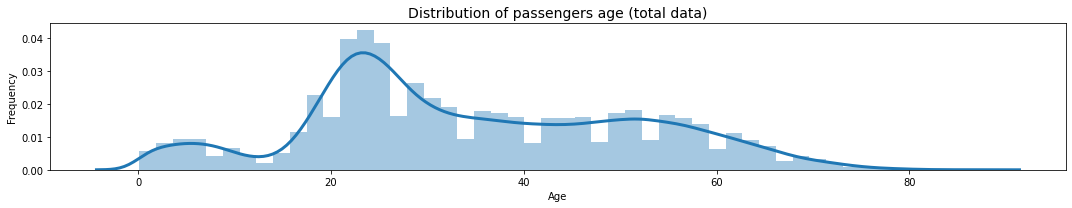

In [14]:
plt.figure(figsize=(15,3))

sb.distplot(total_df[(total_df['Age']>0)].Age, kde_kws={'lw':3}, bins=50)

plt.title('Distribution of passengers age (total data)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()

In [15]:
age_distr= pd.DataFrame(total_df['Age'].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,193221.0,34.464565,16.783847,0.08,22.0,31.0,48.0,87.0


0.08세 ~ 87세까지 다양하게 나이대가 있으며 mean=34.46세 이다. 

### 1-1) Age by surviving status

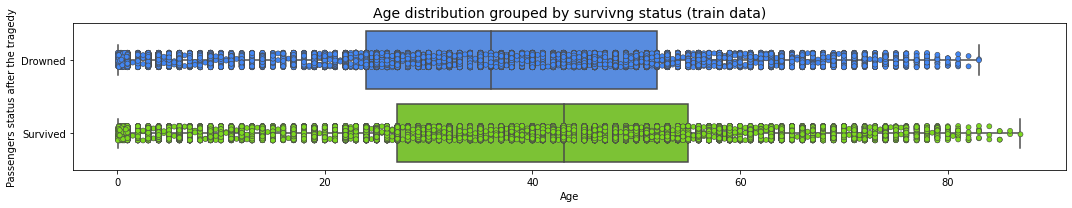

In [16]:
plt.figure(figsize=(15,3))

sb.boxplot(y='Survived', x='Age', data=train, palette=['#4287f5','#7cd91e'], fliersize=0, orient='h')

sb.stripplot(y='Survived',x='Age', data=train, linewidth=0.6, palette=['#4287f5','#7cd91e'], orient='h')
plt.yticks(np.arange(2), ['Drowned','Survived'])
plt.title('Age distribution grouped by survivng status (train data)', fontsize=14)
plt.ylabel('Passengers status after the tragedy')
plt.tight_layout()

In [17]:
pd.DataFrame(total_df.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,55290.0,36.708695,17.809058,0.08,24.0,36.0,52.0,83.0
1.0,41418.0,40.553799,18.742172,0.08,27.0,43.0,55.0,87.0


### 1-2) Age by Pclass

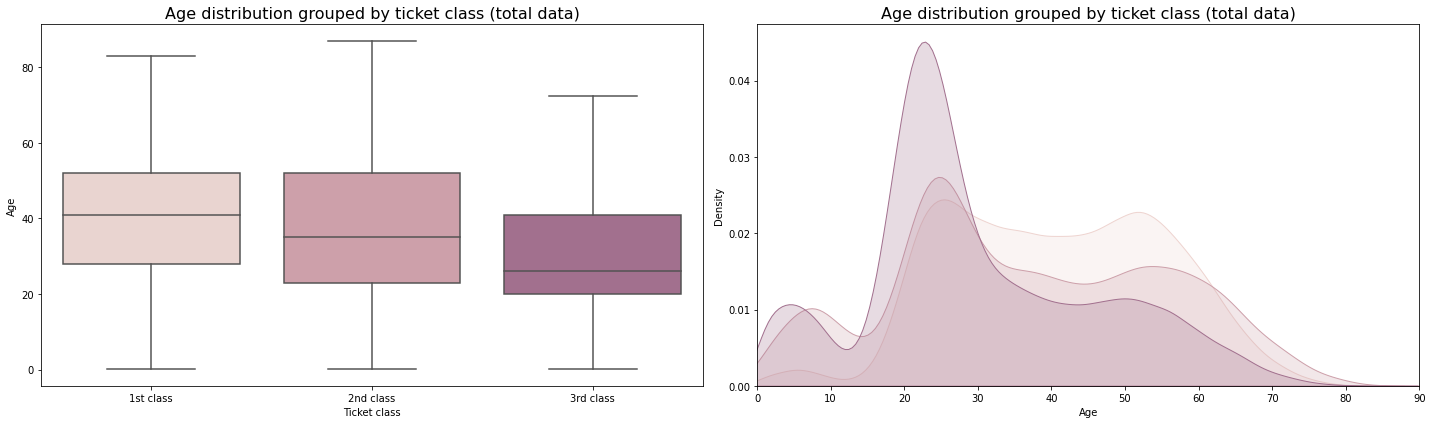

In [18]:
plt.figure(figsize=(20,6))

palette=sb.cubehelix_palette(5, start=3)

plt.subplot(1,2,1)
sb.boxplot(x='Pclass', y='Age', data=total_df, palette=palette, fliersize=0)

plt.xticks(np.arange(3), ['1st class','2nd class','3rd class'])
plt.title('Age distribution grouped by ticket class (total data)', fontsize=16)
plt.xlabel('Ticket class')

plt.subplot(1,2,2)

age_1_class = total_df[(total_df['Age']>0)&(total_df['Pclass']==1)]
age_2_class = total_df[(total_df['Age']>0)&(total_df['Pclass']==2)]
age_3_class = total_df[(total_df['Age']>0)&(total_df['Pclass']==3)]

# Ploting the 3 variables that we create
sb.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sb.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sb.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (total data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

In [19]:
pd.DataFrame(total_df.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,55365.0,40.672757,14.715634,0.08,28.0,41.0,52.0,83.0
2,36606.0,36.855067,18.470623,0.08,23.0,35.0,52.0,87.0
3,101250.0,30.205570,15.954521,0.08,20.0,26.0,41.0,85.0


2nd 클래스는 1st, 3rd 클래스에 비해 더 넓은 분포를 가진다. 또한 거의 대칭 적이다.\
가장 나이가 적은 passenger은 1,2,3 등급 동일한 나이인 0.08세이다. \
가장 나이가 많은 passenger은 2nd 클래스의 87세이다.

3rd 클래스 mean age= 30.2세\
2nd 클래스 mean age= 36.9세\
1st 클래스 mean age= 40.7세

### 1-3) Age vs Pclass vs Sex

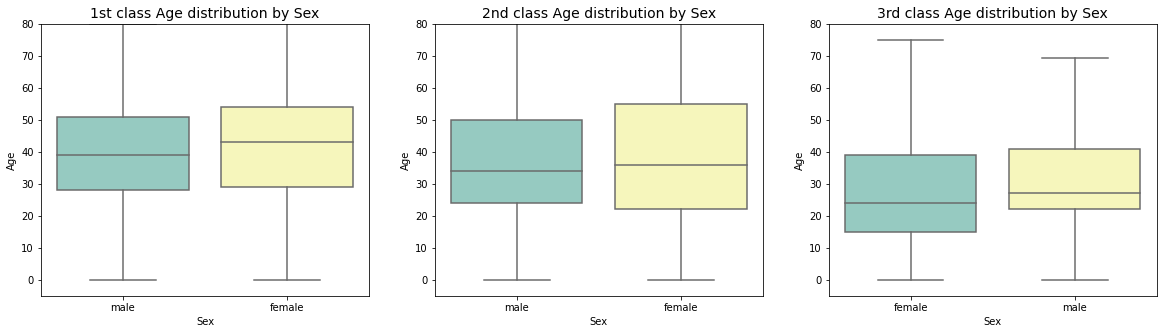

In [20]:
plt.figure(figsize=(20, 5))
palette = "Set3"

plt.subplot(1, 3, 1)
sb.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
#sb.stripplot(x = 'Sex', y = 'Age', data = age_1_class,linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sb.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
#sb.stripplot(x = 'Sex', y = 'Age', data = age_2_class,linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sb.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
#sb.stripplot(x = 'Sex', y = 'Age', data = age_3_class,order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

In [21]:
age_1_class_stat = pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())

pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min   25%   50%   75%   max
    Sex                                                                
1st female  25790.0  41.974173  15.253798  0.08  29.0  43.0  54.0  83.0
    male    29575.0  39.537896  14.132517  0.08  28.0  39.0  51.0  80.0
2nd female  17554.0  37.283031  20.558883  0.08  22.0  36.0  55.0  87.0
    male    19052.0  36.460753  16.302224  0.08  24.0  34.0  50.0  85.0
3rd female  28349.0  27.222629  17.974800  0.08  15.0  24.0  39.0  85.0
    male    72901.0  31.365545  14.936175  0.08  22.0  27.0  41.0  83.0

#### 2) Cabin
- 첫번째 코드만 추출함
- A: lst class
- B
- C: 3rd class
- D: walking area
- E: 1st and 2nd class
- F: 2nd class, 2rd class
- G: boiler room
- T: boat deck
- U: Unknown

In [22]:
total_df['Cabin']=total_df['Cabin'].str.split('',expand=True)[1]
total_df.loc[total_df['Cabin'].isna(), 'Cabin']='X'

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


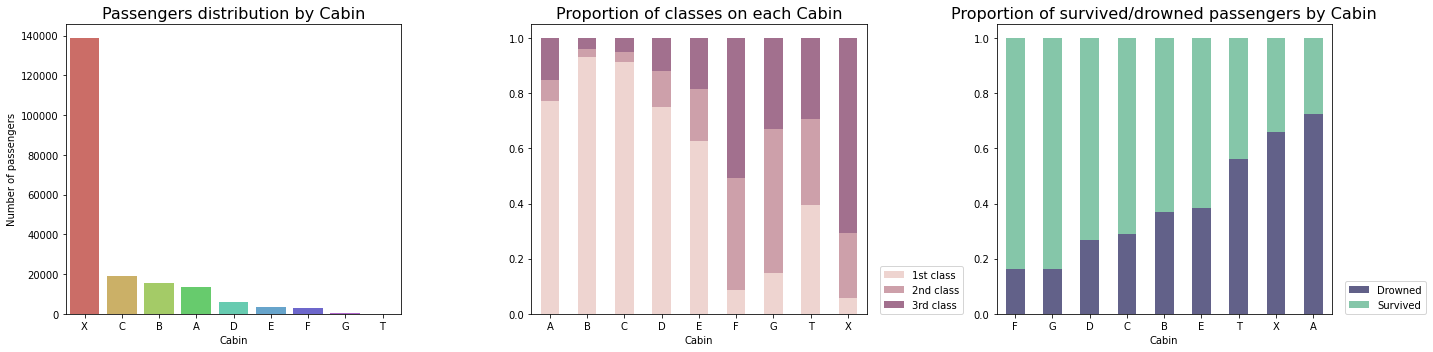

In [23]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sb.countplot(x = 'Cabin', data = total_df, palette = "hls", order = total_df['Cabin'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by Cabin',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
Cabin_by_class = total_df.groupby('Cabin')['Pclass'].value_counts(normalize = True).unstack()
Cabin_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each Cabin',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
Cabin_by_survived = total_df.groupby('Cabin')['Survived'].value_counts(normalize = True).unstack()
Cabin_by_survived = Cabin_by_survived.sort_values(by = 1, ascending = False)
Cabin_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by Cabin',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()


- 대부분의 passengers는 Cabin code가 없다. 
- Cabin code가 나와있는 승객들 중 가장 많은 수를 차지하는 deck은 'C'이며 lst class ticket이다. 'C' deck은 살아남은 승객들 중 4번째이다. 
- 가장 많은 생존률을 가진 deck은 'F'이다. 
- 'A' deck은 lifeboats와 가장 가까운 deck이였지만 생존률은 가장 낮은 확률을 보이고 있다. 

### 3) Family
- Family size = Sib + Parch +1

In [24]:
total_df['Family_size']=total_df['SibSp']+total_df['Parch']+1
family_size=total_df['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)

Family size and number of passengers:
1     116448
2      30139
3      25289
4      19724
5       4151
6       2021
7       1184
10       397
11       242
8        162
9        157
14        46
12        26
13         7
18         4
15         3
Name: Family_size, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


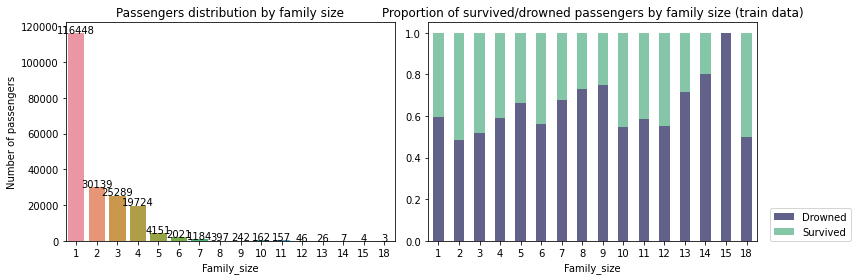

In [25]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sb.countplot(total_df['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (total_df['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = total_df.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

- family size가 15명인 그룹은 모두 살아남지 못하였다. 
- 대부분은 혼자 여행하는 사람들이였고, 생존율은 40% 정도 이다. 
- 가장 높은 생존율을 보이는 family size는 2,3 정도이다. 
- 4개의 category로 family size group을 나누어보겠다.
- single
- usual(sizes 2,3,4,5)
- big(6,7,8,9)
- large(all bigger then 10)

In [26]:
total_df['Family_size_group']=total_df['Family_size'].map(lambda x: 'f_single' if x ==1
                                                         else('f_usual' if 6>x>=2
                                                             else('f_big' if 10>x>=6
                                                                 else('f_large'))))

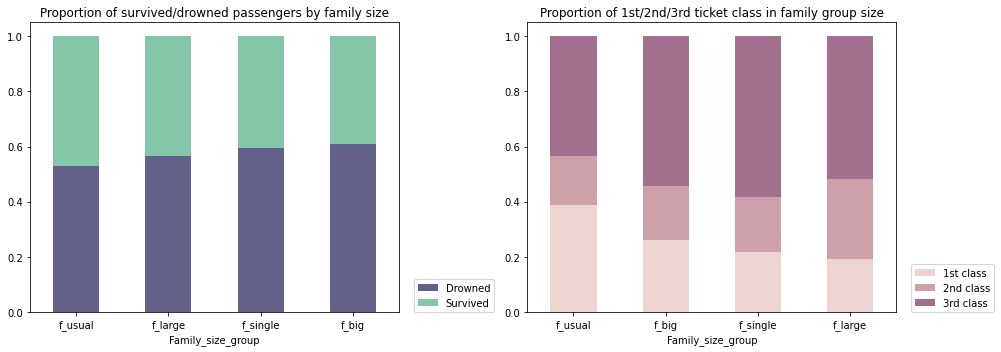

In [27]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(121)
d = total_df.groupby('Family_size_group')['Survived'].value_counts(normalize = True).unstack()
d = d.sort_values(by = 1, ascending = False)
d.plot(kind='bar', stacked='True', color = ["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Proportion of survived/drowned passengers by family size')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax2 = fig.add_subplot(122)
d2 = total_df.groupby('Family_size_group')['Pclass'].value_counts(normalize = True).unstack()
d2 = d2.sort_values(by = 1, ascending = False)
d2.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of 1st/2nd/3rd ticket class in family group size')
_ = plt.xticks(rotation=False)

plt.tight_layout()

#### 4) Pclass

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


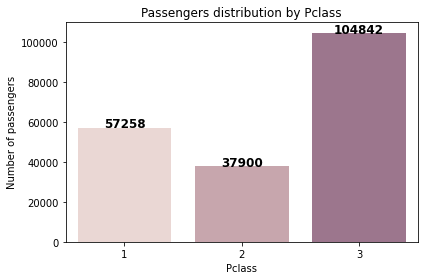

In [28]:
ax = sb.countplot(total_df['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (total_df['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by Pclass')
plt.ylabel('Number of passengers')
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


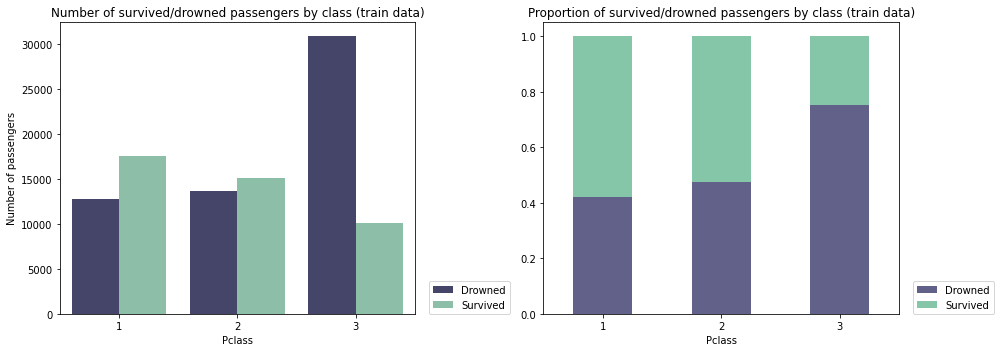

In [29]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sb.countplot(x = 'Pclass', hue = 'Survived', data = total_df, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = total_df.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

- 가장 많은 승객이 탄 3등급 임에도 불구하고 생존율은 가장 적은 승객이 탑승한 1등급에 비해 더 적은 생존율을 보인다. 

### 4-1) Pclass vs Surviving vs Sex

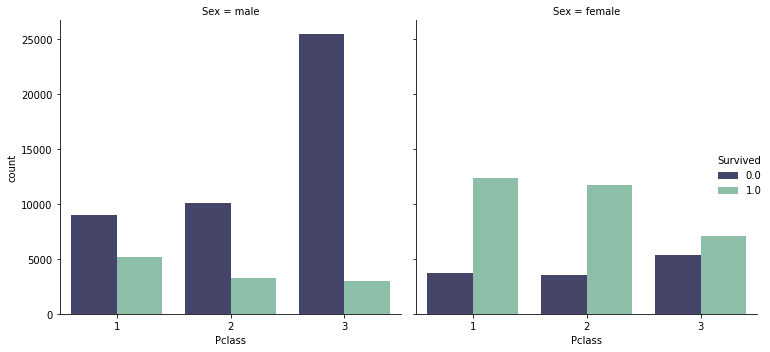

In [30]:
sb.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = total_df , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

- 1등급 클래스의 남성 승객들의 대부분은 살아남지 못하였고 여성들은 대부분 살아남았다. 
- 3등급 클래스의 여성의 절반 이상은 살아남았다. 

### 5) Embarked

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


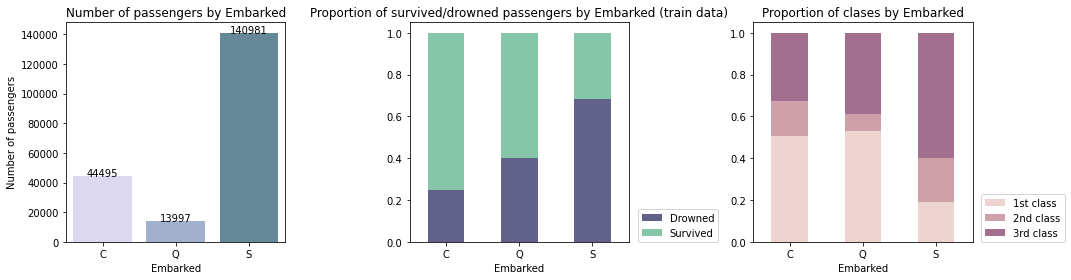

In [31]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sb.cubehelix_palette(5, start = 2)
ax = sb.countplot(total_df['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (total_df['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = total_df.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = total_df.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

- 대부분의 승객(140981)들은 S 항구에서 출발하였고 S 항구에서 출발한 승객들의 생존율은 가장 낮았다. 또한 3등급 클래스 사람들이 대부분이다. 
- C항구에서 출발한 승객들은 75% 이상의 생존율을 보인다. 
- 가장 적은 승객들이 탑승한 Q항구에는 가장 많은 l등급 클래스의 승객들이 탑승하였다. 

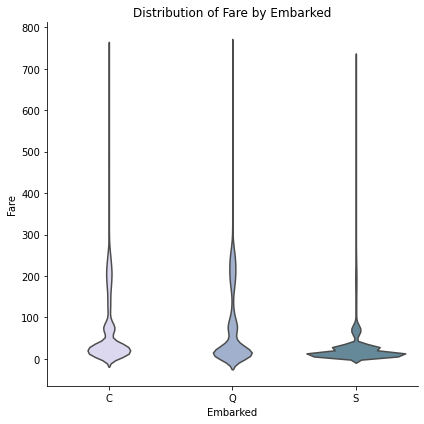

In [32]:
sb.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=total_df, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [33]:
pd.DataFrame(total_df.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,44440.0,73.673693,87.985577,1.51,13.54,31.42,89.5025,744.46
Q,13977.0,78.479737,92.941969,2.29,10.81,28.45,115.6700,744.66
S,140791.0,32.125407,50.934735,0.05,9.50,13.24,29.9900,727.65


### 6) Fare

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


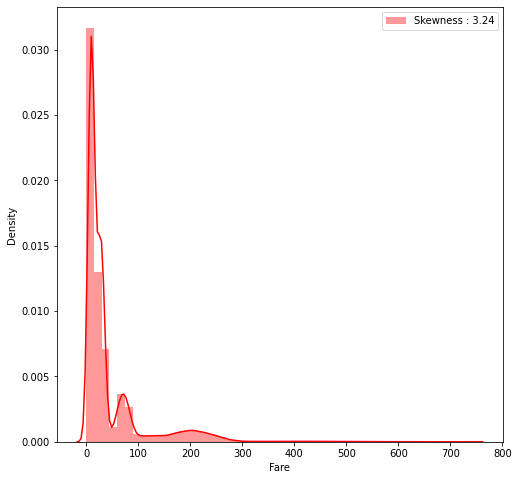

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sb.distplot(total_df['Fare'], color='r', label='Skewness : {:.2f}'.format(total_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


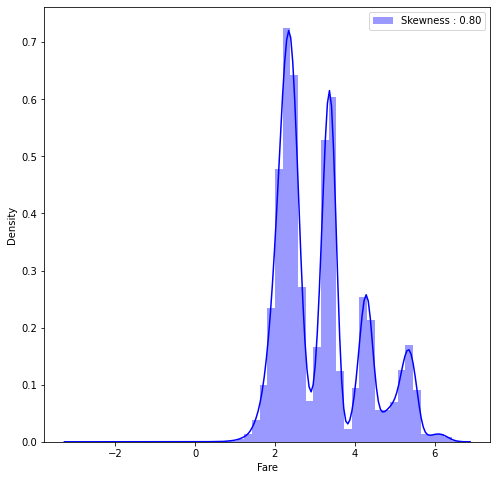

In [35]:
fare_map = total_df[['Fare', 'Pclass']].dropna().groupby('Pclass').median().to_dict()
total_df['Fare'] = total_df['Fare'].fillna(total_df['Pclass'].map(fare_map['Fare']))

total_df['Fare'] = total_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sb.distplot(total_df['Fare'], color='b', label='Skewness : {:.2f}'.format(total_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# Feature Engineering

- Null values 확인

In [36]:
total_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group
0,0,1.0,1,"Oconnor, Frankie",male,NaN,2,0,209245,3.301009,C,S,3,f_usual
1,1,0.0,3,"Bryan, Drew",male,NaN,0,0,27323,2.591516,X,S,1,f_single
2,2,0.0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,4.266756,X,S,4,f_usual
3,3,0.0,3,"Kramer, James",male,19.00,0,0,A. 10866,2.568022,X,S,1,f_single
4,4,1.0,3,"Bond, Michael",male,25.00,0,0,427635,2.048982,X,S,1,f_single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,NaN,3,"Cash, Cheryle",female,27.00,0,0,7686,2.314514,X,Q,1,f_single
99996,199996,NaN,1,"Brown, Howard",male,59.00,1,0,13004,4.224056,X,S,2,f_usual
99997,199997,NaN,3,"Lightfoot, Cameron",male,47.00,0,0,4383317,2.386007,X,S,1,f_single
99998,199998,NaN,1,"Jacobsen, Margaret",female,49.00,1,2,PC 26988,3.390473,B,C,4,f_usual


In [37]:
total_df.isna().sum()

PassengerId               0
Survived             100000
Pclass                    0
Name                      0
Sex                       0
Age                    6779
SibSp                     0
Parch                     0
Ticket                 9804
Fare                      0
Cabin                     0
Embarked                527
Family_size               0
Family_size_group         0
dtype: int64

## 1) Data Correlation

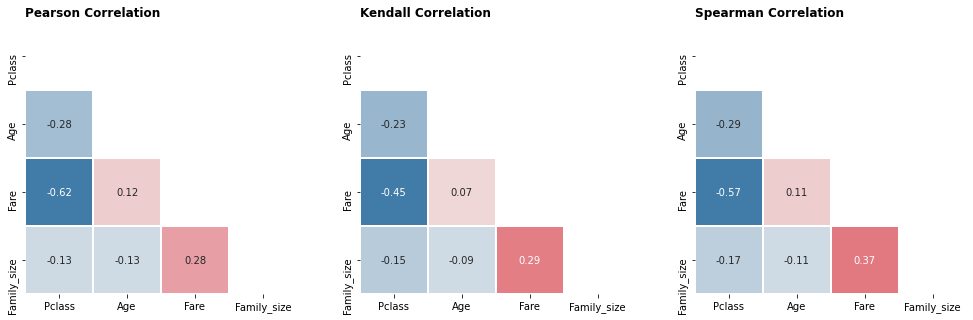

In [38]:
fig, ax=plt.subplots(1, 3, figsize=(17,5))
feature_lst=['Pclass','Age','Fare','Sex','Family_size']

corr=total_df[feature_lst].corr()

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

for idx, method in enumerate(['pearson','kendall','spearman']):
    sb.heatmap(total_df[feature_lst].corr(method=method), ax=ax[idx],
              square=True, annot=True, fmt='.2f', center=0, linewidth=2,
              cbar=False, cmap=sb.diverging_palette(240, 10, as_cmap=True),
        mask=mask)
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')
    
plt.show()

### 2) Age
- 각 클래스마다 나이의 평균을 각 클래스마다의 null 값에 넣어주었다. 

In [39]:
age_map= total_df[['Age','Pclass']].dropna().groupby('Pclass').median().to_dict()
total_df['Age']=total_df['Age'].fillna(total_df['Pclass'].map(age_map['Age']))

### 3) Embarked

In [40]:
print('Embarked has ', sum(total_df['Embarked'].isnull()), ' Null values')

Embarked has  527  Null values


In [41]:
total_df['Embarked'] = total_df['Embarked'].fillna('S')

In [42]:
total_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group
0,0,1.0,1,"Oconnor, Frankie",male,41.00,2,0,209245,3.301009,C,S,3,f_usual
1,1,0.0,3,"Bryan, Drew",male,26.00,0,0,27323,2.591516,X,S,1,f_single
2,2,0.0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,4.266756,X,S,4,f_usual
3,3,0.0,3,"Kramer, James",male,19.00,0,0,A. 10866,2.568022,X,S,1,f_single
4,4,1.0,3,"Bond, Michael",male,25.00,0,0,427635,2.048982,X,S,1,f_single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,NaN,3,"Cash, Cheryle",female,27.00,0,0,7686,2.314514,X,Q,1,f_single
99996,199996,NaN,1,"Brown, Howard",male,59.00,1,0,13004,4.224056,X,S,2,f_usual
99997,199997,NaN,3,"Lightfoot, Cameron",male,47.00,0,0,4383317,2.386007,X,S,1,f_single
99998,199998,NaN,1,"Jacobsen, Margaret",female,49.00,1,2,PC 26988,3.390473,B,C,4,f_usual


### 4) Name

In [43]:
total_df['Name'] = total_df['Name'].map(lambda x: x.split(',')[0])

### 5) Ticket

In [44]:
total_df['Ticket'] = total_df['Ticket'].fillna('X').map(lambda x:str(x).split()[0] if len(str(x).split()) > 1 else 'X')

### 6) Drop
- PassengerId, Name, SibSp, Parch, Cabin

In [45]:
total_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group
0,0,1.0,1,Oconnor,male,41.00,2,0,X,3.301009,C,S,3,f_usual
1,1,0.0,3,Bryan,male,26.00,0,0,X,2.591516,X,S,1,f_single
2,2,0.0,3,Owens,male,0.33,1,2,CA,4.266756,X,S,4,f_usual
3,3,0.0,3,Kramer,male,19.00,0,0,A.,2.568022,X,S,1,f_single
4,4,1.0,3,Bond,male,25.00,0,0,X,2.048982,X,S,1,f_single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,NaN,3,Cash,female,27.00,0,0,X,2.314514,X,Q,1,f_single
99996,199996,NaN,1,Brown,male,59.00,1,0,X,4.224056,X,S,2,f_usual
99997,199997,NaN,3,Lightfoot,male,47.00,0,0,X,2.386007,X,S,1,f_single
99998,199998,NaN,1,Jacobsen,female,49.00,1,2,PC,3.390473,B,C,4,f_usual


In [46]:
total_df.drop(['PassengerId','Name','Family_size_group','Family_size'], axis=1, inplace=True)
total_df.shape

(200000, 10)

In [47]:
total_df['Sex']=total_df['Sex'].map({'female':0, 'male':1})
total_df=pd.get_dummies(total_df, columns=['Embarked'], prefix='Embarked')
total_df=pd.get_dummies(total_df, columns=['Cabin'], prefix='Cabin')
total_df=pd.get_dummies(total_df, columns=['Ticket'], prefix='Ticket')
#total_df=pd.get_dummies(total_df, columns=['Family_size_group'], prefix='Family_size_group')

In [48]:
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_SOTON/OQ,Ticket_STON/O,Ticket_STON/O2.,Ticket_STON/OQ.,Ticket_SW/PP,Ticket_W./C.,Ticket_W.E.P.,Ticket_W/C,Ticket_WE/P,Ticket_X
0,1.0,1,1,41.00,2,0,3.301009,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,3,1,26.00,0,0,2.591516,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.0,3,1,0.33,1,2,4.266756,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,3,1,19.00,0,0,2.568022,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,1,25.00,0,0,2.048982,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,3,0,27.00,0,0,2.314514,0,1,0,...,0,0,0,0,0,0,0,0,0,1
99996,NaN,1,1,59.00,1,0,4.224056,0,0,1,...,0,0,0,0,0,0,0,0,0,1
99997,NaN,3,1,47.00,0,0,2.386007,0,0,1,...,0,0,0,0,0,0,0,0,0,1
99998,NaN,1,0,49.00,1,2,3.390473,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split data

In [49]:
X = total_df[:train.shape[0]]
print("X Shape is:", X.shape)
y = X['Survived']
X.drop(['Survived'], axis=1, inplace=True)
test_data = total_df[train.shape[0]:].drop(columns=['Survived'])
test_data.info()

X Shape is: (100000, 69)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Pclass             100000 non-null  int64  
 1   Sex                100000 non-null  int64  
 2   Age                100000 non-null  float64
 3   SibSp              100000 non-null  int64  
 4   Parch              100000 non-null  int64  
 5   Fare               100000 non-null  float64
 6   Embarked_C         100000 non-null  uint8  
 7   Embarked_Q         100000 non-null  uint8  
 8   Embarked_S         100000 non-null  uint8  
 9   Cabin_A            100000 non-null  uint8  
 10  Cabin_B            100000 non-null  uint8  
 11  Cabin_C            100000 non-null  uint8  
 12  Cabin_D            100000 non-null  uint8  
 13  Cabin_E            100000 non-null  uint8  
 14  Cabin_F            100000 non-null  uint8  
 15  Cabin_G            100000 n

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify = X[['Pclass']], random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((70000, 68), (30000, 68), (70000,), (30000,))

## Modeling
> *references*
> [https://www.kaggle.com/j2hoon85/tps-april-sklearn-pycaret-for-newbies](https://www.kaggle.com/j2hoon85/tps-april-sklearn-pycaret-for-newbies)

### XGBoost Shap

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[06:00:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


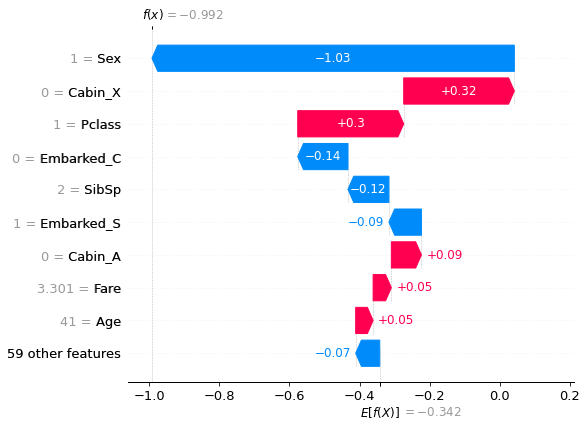

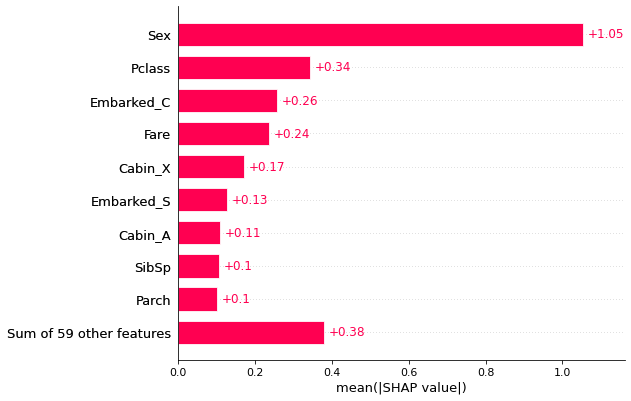

In [51]:
import xgboost
import shap

# train an XGBoost model
xgb_model = xgboost.XGBClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

shap.plots.bar(shap_values)

### Decision Tree

In [52]:
from sklearn.metrics import accuracy_score
def acc_score(y_true, y_pred, **kwargs):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

Model AUC: 0.8505605139706627
Model Accurarcy: 0.7833333333333333




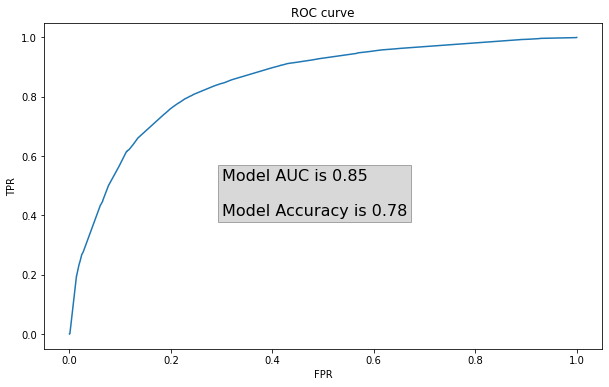

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

tree_model = DecisionTreeClassifier(max_depth=7)
tree_model.fit(X_train, y_train)
predictions = tree_model.predict_proba(X_valid)
AUC = roc_auc_score(y_valid, predictions[:,1])
ACC = acc_score(y_valid, predictions[:,1])
print("Model AUC:", AUC)
print("Model Accurarcy:", ACC)
print("\n")

fpr, tpr, _ = roc_curve(y_valid, predictions[:,1])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fpr, tpr)
ax.text(x = 0.3, 
        y = 0.4, 
        s = "Model AUC is {}\n\nModel Accuracy is {}".format(np.round(AUC, 2), np.round(ACC, 2)), 
        fontsize=16, bbox=dict(facecolor='gray', alpha=0.3))
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve')

plt.show()

In [54]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

SEED = 0

class sk_helper(object):
    def __init__(self, model, seed=0, params={}):
        params['random_state']=seed
        self.model=model(**params)
        self.model_name=str(model).split('.')[-1][:-2]
        
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict(self, y_valid):
        return self.model.predict(y_valid)
    
    def fit(self, x, y):
        return self.model.fit(x,y)
    
    # feature importance
    def feature_importances(self, X_train, y_train):
        return self.model.fit(X_train, y_train).feature_importances_
        
    # roc_curve
    def roc_curve_graph(self, X_train, y_train, X_valid, y_valid):
        self.model.fit(X_train, y_train)
        
        print("model_name:", self.model_name)
        model_name = self.model_name
        preds_proba = self.model.predict_proba(X_valid)
        preds = (preds_proba[:, 1] > 0.5).astype(int)
        auc = roc_auc_score(y_valid, preds_proba[:, 1])
        acc = accuracy_score(y_valid, preds)
        confusion = confusion_matrix(y_valid, preds)
        print('Confusion Matrix')
        print(confusion)
        print("Model AUC: {0:.3f}, Model Accuracy: {1:.3f}\n".format(auc, acc))
        fpr, tpr, _ = roc_curve(y_valid, preds_proba[:,1])
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.plot(fpr, tpr)
        ax.text(x = 0.3, 
                y = 0.4, 
                s = "Model AUC is {}\n\nModel Accuracy is {}".format(np.round(auc, 2), np.round(acc, 2)), 
                fontsize=16, bbox=dict(facecolor='gray', alpha=0.3))
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.set_title('ROC curve of {}'.format(model_name), fontsize=16)

        plt.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


model_name: RandomForestClassifier


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.7s finished


Confusion Matrix
[[14356  2879]
 [ 3582  9183]]
Model AUC: 0.855, Model Accuracy: 0.785



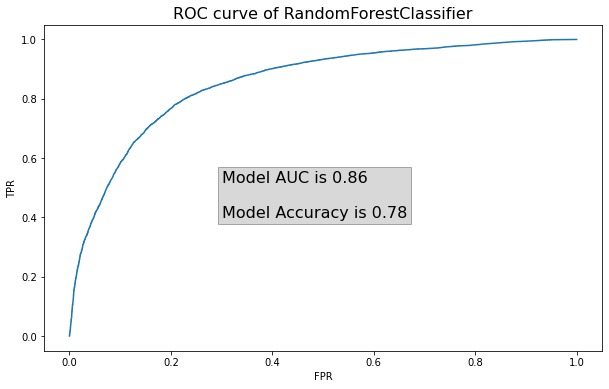

CPU times: user 38.2 s, sys: 250 ms, total: 38.4 s
Wall time: 10.5 s


In [55]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

rf_model=sk_helper(model=RandomForestClassifier, seed=SEED, params=rf_params)
rf_model.roc_curve_graph(X_train, y_train, X_valid, y_valid)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 30009, number of negative: 39991
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 70000, number of used featu

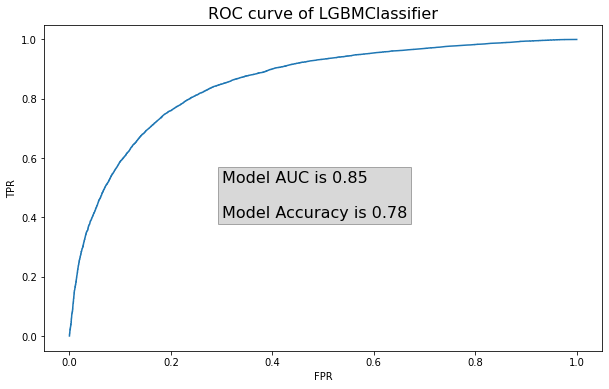

CPU times: user 5.81 s, sys: 134 ms, total: 5.94 s
Wall time: 3.82 s


In [56]:
%%time

import lightgbm as lgb

lgb_params = {
    'metric': 'binary_logloss',
    'n_estimators': 1000,
    'objective': 'binary',
    'random_state': 2021,
    'learning_rate': 0.01,
    'min_child_samples': 150,
    'reg_alpha': 3e-5,
    'reg_lambda': 9e-2,
    'num_leaves': 20,
    'max_depth': 16,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'subsample_freq': 2,
    'max_bin': 240
}

lgb_model=sk_helper(model=lgb.LGBMClassifier, seed=SEED, params=rf_params)
lgb_model.roc_curve_graph(X_train, y_train, X_valid, y_valid)

In [57]:
!pip install catboost

0:	learn: 0.6884406	total: 80.5ms	remaining: 1m 20s
1:	learn: 0.6838170	total: 104ms	remaining: 51.9s
2:	learn: 0.6792866	total: 120ms	remaining: 40s
3:	learn: 0.6749307	total: 144ms	remaining: 35.9s
4:	learn: 0.6705501	total: 168ms	remaining: 33.4s
5:	learn: 0.6662601	total: 192ms	remaining: 31.8s
6:	learn: 0.6621476	total: 214ms	remaining: 30.4s
7:	learn: 0.6580493	total: 238ms	remaining: 29.5s
8:	learn: 0.6541011	total: 260ms	remaining: 28.6s
9:	learn: 0.6502757	total: 276ms	remaining: 27.3s
10:	learn: 0.6465377	total: 302ms	remaining: 27.1s
11:	learn: 0.6427935	total: 325ms	remaining: 26.8s
12:	learn: 0.6391145	total: 348ms	remaining: 26.4s
13:	learn: 0.6356544	total: 369ms	remaining: 26s
14:	learn: 0.6321140	total: 393ms	remaining: 25.8s
15:	learn: 0.6287126	total: 417ms	remaining: 25.6s
16:	learn: 0.6255104	total: 436ms	remaining: 25.2s
17:	learn: 0.6222667	total: 458ms	remaining: 25s
18:	learn: 0.6190328	total: 484ms	remaining: 25s
19:	learn: 0.6160637	total: 498ms	remaining: 24

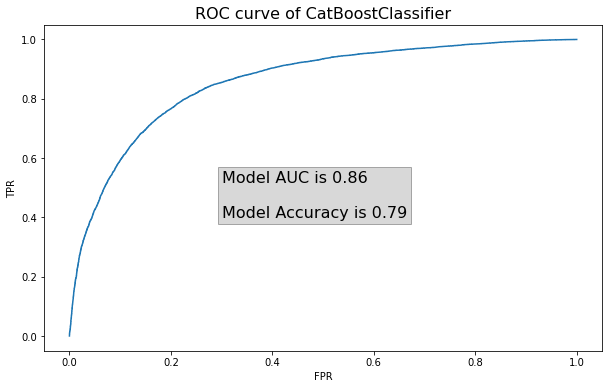

CPU times: user 1min 13s, sys: 8.63 s, total: 1min 22s
Wall time: 24.8 s


In [58]:
%%time

from catboost import CatBoostClassifier

cb_params = {
    'max_depth': 8,
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'max_bin': 280,
    'min_data_in_leaf': 64,
    'l2_leaf_reg': 0.01,
    'subsample': 0.8
}

cb_model=sk_helper(model=CatBoostClassifier, seed=SEED, params=cb_params)
cb_model.roc_curve_graph(X_train, y_train, X_valid, y_valid)

In [59]:
import numpy as np
from datetime import datetime

version = datetime.now().strftime("%d-%m-%Y %H-%M-%S")

def final_submission(model, data, version):
    final_preds = model.predict(data)
    binarizer = np.vectorize(lambda x: 1 if x >= .5 else 0)
    prediction_binarized = binarizer(final_preds)
    submission = pd.concat([sample_submission,pd.DataFrame(prediction_binarized)], axis=1).drop(columns=['Survived'])
    submission.columns = ['PassengerId', 'Survived']
    submission.to_csv('Sklearn of Submission.csv'.format(version), index=False)
    
final_submission(cb_model, test_data, version)